In [34]:
import numpy as np
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.mappers import JordanWignerMapper,BravyiKitaevMapper
from qiskit.circuit import QuantumCircuit, ParameterVector, Parameter, QuantumRegister

In [35]:
n = 4
N = 2*n
t=1
mu=1.5
U=3

In [36]:
def qOp(i,j):
    return FermionicOp(
    {
        "+_{i} -_{j}".format(i=i%N,j=j%N): 1.0,
    },
    num_spin_orbitals=N,
)

In [60]:
t_term = 0
mu_term =0
U_term =0
for i in range(n):
    print(qOp(2*i,2*i+2))
    print(qOp(2*i+1,2*i+3))
    t_term+= qOp(2*i,2*i+2) + qOp(2*i+2,2*i) + qOp(2*i+1,2*i+3) + qOp(2*i+3,2*i+1) 
    mu_term += qOp(2*i,2*i) + qOp(2*i+1,2*i+1)
    U_term += (qOp(2*i,2*i) @ qOp(2*i+1, 2*i+1))
H = U * U_term - mu * mu_term - t * t_term

print(H)

Fermionic Operator
number spin orbitals=8, number terms=1
  1.0 * ( +_0 -_2 )
Fermionic Operator
number spin orbitals=8, number terms=1
  1.0 * ( +_1 -_3 )
Fermionic Operator
number spin orbitals=8, number terms=1
  1.0 * ( +_2 -_4 )
Fermionic Operator
number spin orbitals=8, number terms=1
  1.0 * ( +_3 -_5 )
Fermionic Operator
number spin orbitals=8, number terms=1
  1.0 * ( +_4 -_6 )
Fermionic Operator
number spin orbitals=8, number terms=1
  1.0 * ( +_5 -_7 )
Fermionic Operator
number spin orbitals=8, number terms=1
  1.0 * ( +_6 -_0 )
Fermionic Operator
number spin orbitals=8, number terms=1
  1.0 * ( +_7 -_1 )
Fermionic Operator
number spin orbitals=8, number terms=1
  1.0 * ( +_0 -_2 )
Fermionic Operator
number spin orbitals=8, number terms=1
  1.0 * ( +_1 -_3 )
Fermionic Operator
number spin orbitals=8, number terms=1
  1.0 * ( +_2 -_4 )
Fermionic Operator
number spin orbitals=8, number terms=1
  1.0 * ( +_3 -_5 )
Fermionic Operator
number spin orbitals=8, number terms=1
  1.0 

In [38]:
mapper = JordanWignerMapper()
qubit_jw_op = mapper.map(H)
print(qubit_jw_op)

SparsePauliOp(['IIIIIIII', 'IIIIIIZZ', 'IIIIZZII', 'IIZZIIII', 'ZZIIIIII', 'IIYZYIII', 'IIXZXIII', 'IYZYIIII', 'IXZXIIII', 'IXZZZZZX', 'IYZZZZZY', 'IIIXZXII', 'IIIYZYII', 'YZYIIIII', 'XZXIIIII', 'IIIIYZYI', 'IIIIXZXI', 'IIIIIYZY', 'IIIIIXZX', 'YZZZZZYI', 'XZZZZZXI'],
              coeffs=[-3.  +0.j,  0.75+0.j,  0.75+0.j,  0.75+0.j,  0.75+0.j, -0.5 +0.j,
 -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j,
 -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j,
 -0.5 +0.j, -0.5 +0.j, -0.5 +0.j])


In [39]:
from qiskit.algorithms import NumPyEigensolver
from qiskit.visualization import plot_histogram
from qiskit.opflow.primitive_ops import PauliSumOp, PauliOp

# find the first three (k=3) eigenvalues
exact_solver = NumPyEigensolver(k=1)
qubit_jw_op1 = PauliSumOp(qubit_jw_op)
exact_result = exact_solver.compute_eigenvalues(qubit_jw_op1)

# Save ground state energy for later
gs_energy = np.round(exact_result.eigenvalues[0], 4)

gvec = exact_result.eigenstates[0].primitive.data

print(bin(np.argmax(gvec)))
for i,g in enumerate(gvec):
    if np.abs(g) > 1e-10:
        print(np.abs(g))
        print(bin(i))
        print(bin(i).count("1")) #counts the number of filled orbitals

/var/folders/n_/1wl7_2l52y3g1_82hvk9hw3h0000gn/T/ipykernel_19983/449054540.py:6: DeprecationWarning: The class ``qiskit.algorithms.eigen_solvers.numpy_eigen_solver.NumPyEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.eigensolvers.NumPyEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  exact_solver = NumPyEigensolver(k=1)
/var/folders/n_/1wl7_2l52y3g1_82hvk9hw3h0000gn/T/ipykernel_19983/449054540.py:7: DeprecationWarning: The class ``qiskit.opflow.primitive_ops.pauli_sum_op.PauliSumOp`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  qubit_jw_op1 = PauliSumOp(qubit_jw_op)


0b1100110
0.067441045519863
0b1111
4
0.1420380732460797
0b11011
4
0.14203807324607767
0b100111
4
0.14203807324607745
0b110110
4
0.14203807324607978
0b111001
4
0.06744104551986285
0b111100
4
0.14203807324607753
0b1001110
4
0.23434479467468
0b1011010
4
0.14203807324607742
0b1100011
4
0.4686895893493562
0b1100110
4
0.23434479467468014
0b1101001
4
0.14203807324607753
0b1101100
4
0.14203807324607748
0b1110010
4
0.14203807324607995
0b10001101
4
0.14203807324607978
0b10010011
4
0.2343447946746799
0b10010110
4
0.4686895893493645
0b10011001
4
0.1420380732460796
0b10011100
4
0.23434479467468067
0b10100101
4
0.14203807324607978
0b10110001
4
0.06744104551986292
0b11000011
4
0.14203807324607742
0b11000110
4
0.14203807324607978
0b11001001
4
0.14203807324607962
0b11011000
4
0.14203807324607756
0b11100100
4
0.06744104551986305
0b11110000
4


In [40]:
print(gs_energy)

-8.4244


In [41]:
from qiskit_algorithms import VQE
from qiskit.primitives import Estimator, Sampler
from qiskit.circuit.library import EfficientSU2
from qiskit_algorithms.optimizers import SPSA, COBYLA, QNSPSA, SLSQP

n = qubit_jw_op.num_qubits
est = Estimator()
ansatz = EfficientSU2(n)
optimizer = SPSA(maxiter = 500)
intermediate_info = []
params_info = []
def callback(eval_count,params,value,meta):
        intermediate_info.append(value)
        params_info.append(params)

vqe = VQE(est,ansatz,optimizer,callback = callback)


In [42]:
eigen = vqe.compute_minimum_eigenvalue(qubit_jw_op).eigenvalue

In [43]:
print(eigen)

-7.066861268610404


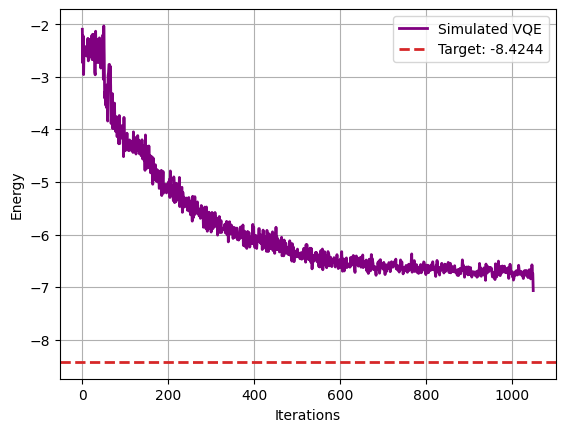

In [44]:
import matplotlib.pyplot as plt
plt.plot(intermediate_info, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
# Exact ground state energy value
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()

In [73]:
def opt_params(n = 4,t = 1.0,mu = 1.5,U = 3.0):
    t_term = 0
    mu_term =0
    U_term =0
    for i in range(n):
        '''print(qOp(2*i,2*i+2))
        print(qOp(2*i+1,2*i+3))
        print(qOp(2*i+2,2*i))
        print(qOp(2*i+3,2*i+1))
        print("------------------------------")
        print(qOp(2*i,2*i+2)+qOp(2*i+1,2*i+3))
        print("------------------------------")
        print(qOp(2*i,2*i+2)+qOp(2*i+1,2*i+3)+qOp(2*i+3,2*i+1)+qOp(2*i+2,2*i))'''
        t_term+= qOp(2*i,2*i+2) + qOp(2*i+2,2*i) + qOp(2*i+1,2*i+3) + qOp(2*i+3,2*i+1) 
        mu_term += qOp(2*i,2*i) + qOp(2*i+1,2*i+1)
        U_term += (qOp(2*i,2*i) @ qOp(2*i+1, 2*i+1))
    H = U * U_term - mu * mu_term - t * t_term
    mapper = JordanWignerMapper()
    qubit_jw_op = mapper.map(H)
    est = Estimator()
    ansatz = EfficientSU2(n)
    optimizer = SPSA(maxiter = 1000)
    intermediate_info = []
    params_info = []
    def callback(eval_count,params,value,meta):
            intermediate_info.append(value)
            params_info.append(params)
    vqe = VQE(est,ansatz,optimizer,callback = callback)
    eigen = vqe.compute_minimum_eigenvalue(qubit_jw_op).eigenvalue
    return eigen

In [78]:
t_list = np.arange(0.5,2.0,0.5)
U_list = np.arange(1.0,5.0,0.5)
mu_list = U_list/2
ns_list = np.asarray([4])

In [79]:
import pandas as pd

def to_df(ts,Us,mus,ns):
    data = []
    tot = len(ns)*len(ts)*len(Us)*len(mus)
    count = 0
    for n in ns:
        for t in ts:
            for _U in Us:
                for mu in mus:
                    print(np.round(count/tot*100,3))
                    count += 1
                    opt_param = opt_params(n,t,mu,_U)
                    data.append([n,t,_U,mu,opt_param])
    df = pd.DataFrame(data,columns = ["n","t","U","mu","opt_params"])
    return df

In [80]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df = to_df(t_list,U_list,mu_list,ns_list)

y_val= df["opt_params"]
x_data=df.drop("opt_params",axis=1)


X_train, X_eval,y_train,y_eval=train_test_split(x_data,y_val,test_size=0.3,random_state=101)

0.0
0.521
1.042
1.562
2.083
2.604
3.125
3.646
4.167
4.688
5.208
5.729
6.25
6.771
7.292
7.812
8.333
8.854
9.375
9.896
10.417
10.938
11.458
11.979
12.5
13.021
13.542
14.062
14.583
15.104
15.625
16.146
16.667
17.188
17.708
18.229
18.75
19.271
19.792
20.312
20.833
21.354
21.875
22.396
22.917
23.438
23.958
24.479
25.0
25.521
26.042
26.562
27.083
27.604
28.125
28.646
29.167
29.688
30.208
30.729
31.25
31.771
32.292
32.812
33.333
33.854
34.375
34.896
35.417
35.938
36.458
36.979
37.5
38.021
38.542
39.062
39.583
40.104
40.625
41.146
41.667
42.188
42.708
43.229
43.75
44.271
44.792
45.312
45.833
46.354
46.875
47.396
47.917
48.438
48.958
49.479
50.0
50.521
51.042
51.562
52.083
52.604
53.125
53.646
54.167
54.688
55.208
55.729
56.25
56.771
57.292
57.812
58.333
58.854
59.375
59.896
60.417
60.938
61.458
61.979
62.5
63.021
63.542
64.062
64.583
65.104
65.625
66.146
66.667
67.188
67.708
68.229
68.75
69.271
69.792
70.312
70.833
71.354
71.875
72.396
72.917
73.438
73.958
74.479
75.0
75.521
76.042
76.562
77.0

In [81]:
scaler_model = MinMaxScaler()
scaler_model.fit(X_train)

X_train=pd.DataFrame(scaler_model.transform(X_train),columns=X_train.columns,index=X_train.index)

scaler_model.fit(X_eval)

X_eval=pd.DataFrame(scaler_model.transform(X_eval),columns=X_eval.columns,index=X_eval.index)

In [82]:
#Creating Feature Columns
feat_cols=[]
for cols in df.columns[:-1]:
    column=tf.feature_column.numeric_column(cols)
    feat_cols.append(column)
    
print(feat_cols)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
[NumericColumn(key='n', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='t', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='U', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='mu', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [83]:
#The estimator model
model=tf.estimator.DNNRegressor(hidden_units=[6,10,6],feature_columns=feat_cols)

#the input function
input_func=tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

AttributeError: module 'tensorflow' has no attribute 'estimator'

In [ ]:
#Training the model
model.train(input_fn=input_func,steps=1000)

# Ansatz From: https://arxiv.org/pdf/2112.14077

## Notes:
start2: -7.4 descent
start: barren plateau around -4

In [261]:
from qiskit.circuit.library import SwapGate
from scipy.linalg import expm
from qiskit.quantum_info.operators import Operator
from qiskit.extensions import HamiltonianGate

#eZZ gate
theta = 0.7809
Smat = SwapGate().to_matrix()
Sop = Operator(SwapGate())
#print(Sop)
#expS = expm(1j*Smat)
#def expSt(t):
#    return np.power(expS,t)

def eSwap(circ,i,j,t):
    eSt = HamiltonianGate(Sop,t,label = "eSwap")
    circ.append(eSt,[i,j])


def eZZ(circ,i,j,t):
    circ.cx(i,j)
    circ.rz(t,j)
    circ.cx(i,j)

def fij(circ,i,j,t):
    eSwap(circ,i,j,t)
    circ.cp(t,i,j)

def efSwap(circ,i,j,t):
    for k in range(j-1,i,-1):
        circ.cz(j,k)
    fij(circ,i,j,t)
    for k in range(i+1,j,1):
        circ.cz(j,k)

def hopping(circ,r):
    n = circ.num_qubits
    t_s = ParameterVector("t_h{r}".format(r=r),length = n)
    for i in range(n):
        efSwap(circ,i,(i+2)%n,t_s[i])

def interaction(circ,r):
    n = circ.num_qubits
    t_s = ParameterVector("t_i{r}".format(r=r),length = n//2)
    for i in range(0,n,2):
        eZZ(circ,i,i+1,t_s[i//2])


li = [i for i in range(0,n,4)]+[i+1 for i in range(0,n,4)]
def start(circ):
    n = circ.num_qubits
    for i in li:
        circ.x(i)
        circ.h(i+2)
        circ.cx(i,i+2)
    circ.barrier()

def start2(circ):
    n = circ.num_qubits
    li = [i for i in range(0,n//2,2)]+[n-1-i for i in range(0,n//2,2)]
    circ.x(li)
    circ.barrier()

def hopint(circ,reps = 3):
    for r in range(reps):
        hopping(circ,r)
        interaction(circ,r)
    

In [262]:
circ = QuantumCircuit(N)
start2(circ)
hopint(circ,reps = 5)
circ.draw(style = "mpl")


┌───┐ ░    ┌────────┐                                                »
 q_0: ┤ X ├─░────┤0       ├─■──────────────────────────────────────────────»
      └───┘ ░    │        │ │                 ┌────────┐                   »
 q_1: ──────░──■─┤  eSwap ├─┼────────────■────┤0       ├─■─────────────────»
      ┌───┐ ░  │ │        │ │P(t_h0[0])  │    │        │ │                 »
 q_2: ┤ X ├─░──■─┤1       ├─■────────────■──■─┤  eSwap ├─┼────────────■────»
      └───┘ ░    └────────┘                 │ │        │ │P(t_h0[1])  │    »
 q_3: ──────░───────────────────────────────■─┤1       ├─■────────────■──■─»
      ┌───┐ ░                                 └────────┘                 │ »
 q_4: ┤ X ├─░────────────────────────────────────────────────────────────■─»
      └───┘ ░                                                              »
 q_5: ──────░──────────────────────────────────────────────────────────────»
      ┌───┐ ░                                                              »
 q_6: ┤ X ├─░──────────────────────────────────────────────────────────────»
      └───┘ ░                                                              »
 q_7: ──────░──────────────────────────────────────────────────────────────»
            ░                                                              »
 q_8: ──────░──────────────────────────────────────────────────────────────»
      ┌───┐ ░                                                              »
 q_9: ┤ X ├─░──────────────────────────────────────────────────────────────»
      └───┘ ░                                                              »
q_10: ──────░──────────────────────────────────────────────────────────────»
      ┌───┐ ░                                                              »
q_11: ┤ X ├─░──────────────────────────────────────────────────────────────»
      └───┘ ░                                                              »
q_12: ──────░──────────────────────────────────────────────────────────────»
      ┌───┐ ░                                                              »
q_13: ┤ X ├─░──────────────────────────────────────────────────────────────»
      └───┘ ░                                                              »
q_14: ──────░──────────────────────────────────────────────────────────────»
      ┌───┐ ░                                                              »
q_15: ┤ X ├─░──────────────────────────────────────────────────────────────»
      └───┘ ░                                                              »
«                                                                              »
« q_0: ────────────────────────────────────────────────────────────────────────»
«                                                                              »
« q_1: ────────────────────────────────────────────────────────────────────────»
«      ┌────────┐                                                              »
« q_2: ┤0       ├─■──────────────────────────────────────────■─────────────────»
«      │        │ │                 ┌────────┐             ┌─┴─┐┌─────────────┐»
« q_3: ┤  eSwap ├─┼────────────■────┤0       ├─■───────────┤ X ├┤ Rz(t_i0[1]) ├»
«      │        │ │P(t_h0[2])  │    │        │ │           └───┘└─────────────┘»
« q_4: ┤1       ├─■────────────■──■─┤  eSwap ├─┼─────────────■─────────────────»
«      └────────┘                 │ │        │ │P(t_h0[3])   │                 »
« q_5: ───────────────────────────■─┤1       ├─■─────────────■─────────■───────»
«                                   └────────┘                         │       »
« q_6: ────────────────────────────────────────────────────────────────■───────»
«                                                                              »
« q_7: ────────────────────────────────────────────────────────────────────────»
«                                                                              »
« q_8: ────────────────────────────────────────────────────────────────────────»
«      

In [263]:
ans1 = circ
print(ans1.num_qubits)

16


In [264]:
sampler = Sampler()
param_count = ans1.num_parameters
initial_point = np.random.random(param_count)*np.pi
#fidelity = QNSPSA.get_fidelity(ans1, sampler = sampler)
#optimizer = QNSPSA(fidelity,maxiter = 100)
optimizer = COBYLA(maxiter = 1000)
intermediate_info = []
params_info = []
vqe1 = VQE(est,ans1,optimizer,callback = callback,initial_point = initial_point)
eigen = vqe1.compute_minimum_eigenvalue(qubit_jw_op).eigenvalue
print(eigen)

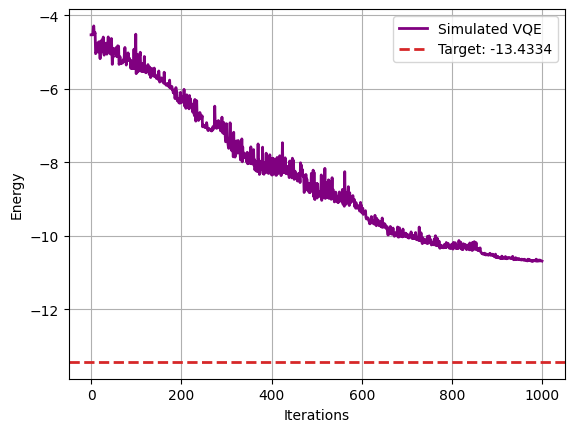

In [ ]:
plt.plot(intermediate_info, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
# Exact ground state energy value
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()

In [ ]:
from qiskit.circuit import Gate
class ParticleSym(Gate):
    def __init__(self,params,rev = True,label = None):
        
        self._rev = rev
        self._params = list(params)
        
        if self._rev:
            self._params[1] = 0
        super().__init__("A",2,self._params)
    
    def _define(self):
        q = QuantumRegister(2, "q")
        circ = QuantumCircuit(q,name = self.name)
        p = self._params[1]+np.pi
        t = self._params[0]+np.pi/2
        circ.cx(1,0)
        '''theta = 2*self._params[0]
        lam = self._params[1]+np.pi
        phi = -self._params[1]
        circ.cu(theta,phi,lam,0,0,1)
        '''
        circ.rz(-p,1)
        circ.ry(-t,1)
        circ.cx(0,1)
        circ.ry(t,1)
        circ.rz(p,1)
        circ.cx(1,0)
        self.definition = circ

In [ ]:
from math import factorial 
from qiskit.circuit import ParameterVector
from qiskit.circuit import QuantumRegister

def comb(n,m):
    return factorial(n)//(factorial(n-m)*factorial(m))

mapping = [(i,(i+1)%N) for i in range(N)]+ [(i,(i+2)%N) for i in range(N)]

def dimer(circ,r=1):
    a2 = []
    for i in range(len(mapping)):
        a2.append(ParameterVector("ß"+str(i)+str(r),2))

    for i in range(len(mapping)):
        circ.append(ParticleSym(a2[i]),mapping[i]) 

In [ ]:
def hopintans(circ,reps = 3):
    for r in range(reps):
        hopping(circ,r)
        interaction(circ,r)
        dimer(circ,r)

In [ ]:
ans2 = QuantumCircuit(N)
start2(ans2)
dimer(ans2)
hopint(ans2,reps = 3)
ans2.draw(style = "mpl")

┌───┐ ░ ┌──────────────┐                                                »
 q_0: ┤ X ├─░─┤0             ├────────────────────────────────────────────────»
      └───┘ ░ │  A(ß01[0],0) │┌──────────────┐                                »
 q_1: ──────░─┤1             ├┤0             ├────────────────────────────────»
      ┌───┐ ░ └──────────────┘│  A(ß11[0],0) │┌──────────────┐                »
 q_2: ┤ X ├─░─────────────────┤1             ├┤0             ├────────────────»
      └───┘ ░                 └──────────────┘│  A(ß21[0],0) │┌──────────────┐»
 q_3: ──────░─────────────────────────────────┤1             ├┤0             ├»
      ┌───┐ ░                                 └──────────────┘│  A(ß31[0],0) │»
 q_4: ┤ X ├─░─────────────────────────────────────────────────┤1             ├»
      └───┘ ░                                                 └──────────────┘»
 q_5: ──────░─────────────────────────────────────────────────────────────────»
            ░                                                                 »
 q_6: ──────░─────────────────────────────────────────────────────────────────»
      ┌───┐ ░                                                                 »
 q_7: ┤ X ├─░─────────────────────────────────────────────────────────────────»
      └───┘ ░                                                                 »
 q_8: ──────░─────────────────────────────────────────────────────────────────»
      ┌───┐ ░                                                                 »
 q_9: ┤ X ├─░─────────────────────────────────────────────────────────────────»
      └───┘ ░                                                                 »
q_10: ──────░─────────────────────────────────────────────────────────────────»
      ┌───┐ ░                                                                 »
q_11: ┤ X ├─░─────────────────────────────────────────────────────────────────»
      └───┘ ░                                                                 »
«                                                                        »
« q_0: ──────────────────────────────────────────────────────────────────»
«      ┌───────────────┐                                                 »
« q_1: ┤0              ├─────────────────────────────────────────────────»
«      │               │                                                 »
« q_2: ┤  A(ß131[0],0) ├─────────────────────────────────────────────────»
«      │               │                ┌───────────────┐                »
« q_3: ┤1              ├────────────────┤0              ├────────────────»
«      └┬──────────────┤                │               │                »
« q_4: ─┤0             ├────────────────┤  A(ß151[0],0) ├────────────────»
«       │  A(ß41[0],0) │┌──────────────┐│               │                »
« q_5: ─┤1             ├┤0             ├┤1              ├────────────────»
«       └──────────────┘│  A(ß51[0],0) │└┬──────────────┤                »
« q_6: ─────────────────┤1             ├─┤0             ├────────────────»
«                       └──────────────┘ │  A(ß61[0],0) │┌──────────────┐»
« q_7: ──────────────────────────────────┤1             ├┤0             ├»
«                                        └──────────────┘│  A(ß71[0],0) │»
« q_8: ──────────────────────────────────────────────────┤1             ├»
«                                                        └──────────────┘»
« q_9: ──────────────────────────────────────────────────────────────────»
«                                                                        »
«q_10: ──────────────────────────────────────────────────────────────────»
«                                                                        »
«q_11: ──────────────────────────────────────────────────────────────────»
«                                                                        »
«                                                        ┌───────────────┐»
« q_0: ────────────────────────────────────────────────

In [ ]:
sampler = Sampler()
param_count = ans2.num_parameters
initial_point = np.random.random(param_count)*np.pi
#fidelity = QNSPSA.get_fidelity(ans2, sampler = sampler)
#optimizer = QNSPSA(fidelity,maxiter = 100)
optimizer = COBYLA(maxiter = 1000)
intermediate_info = []
params_info = []
vqe2 = VQE(est,ans2,optimizer,callback = callback,initial_point = initial_point)
eigen = vqe2.compute_minimum_eigenvalue(qubit_jw_op).eigenvalue
print(eigen)

-10.507689947184527


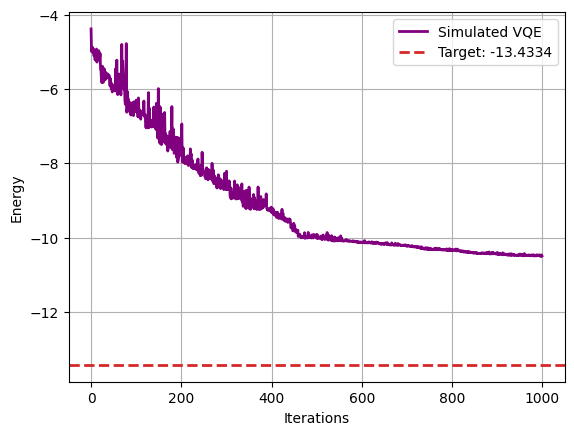

In [ ]:
plt.plot(intermediate_info, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
# Exact ground state energy value
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()